In [0]:
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [22]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


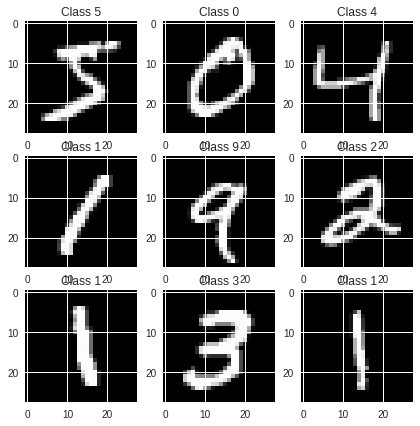

In [23]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [24]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [28]:
model.fit(X_train, Y_train, batch_size = 128, epochs=4, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 13s 218us/step - loss: 0.2444 - acc: 0.9269 - val_loss: 0.1056 - val_acc: 0.9654
Epoch 2/4
60000/60000 [==============================] - 12s 197us/step - loss: 0.1025 - acc: 0.9692 - val_loss: 0.0824 - val_acc: 0.9748
Epoch 3/4
18688/60000 [========>.....................] - ETA: 7s - loss: 0.0715 - acc: 0.9783

60000/60000 [==============================] - 12s 195us/step - loss: 0.0724 - acc: 0.9774 - val_loss: 0.0684 - val_acc: 0.9792
Epoch 4/4
60000/60000 [==============================] - 12s 199us/step - loss: 0.0546 - acc: 0.9827 - val_loss: 0.0664 - val_acc: 0.9802


In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [0]:
from keras.optimizers import Adam

In [31]:
init_lr = 1e-6
losses = []
lrs = []
for i in range(20):
  model = Sequential()
  model.add(Dense(512, input_shape=(784,)))
  model.add(Activation('relu')) 
  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax')) 
  opt = Adam(lr=init_lr*2**i)

  model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['acc'])


  hist = model.fit(X_train, Y_train, batch_size = 128, epochs=1)

  loss = hist.history['loss'][0]
  losses.append(loss)
  lrs.append(init_lr*2**i)

Epoch 1/1
60000/60000 [==============================] - 13s 213us/step - loss: 2.2732 - acc: 0.1354
Epoch 1/1
60000/60000 [==============================] - 13s 213us/step - loss: 2.2564 - acc: 0.1626
Epoch 1/1
50816/60000 [========================>.....] - ETA: 2s - loss: 2.1483 - acc: 0.2956

60000/60000 [==============================] - 13s 216us/step - loss: 2.1169 - acc: 0.3264
Epoch 1/1
60000/60000 [==============================] - 13s 220us/step - loss: 1.9342 - acc: 0.4650
Epoch 1/1
60000/60000 [==============================] - 13s 216us/step - loss: 1.5262 - acc: 0.6157
Epoch 1/1
 7808/60000 [==>...........................]

60000/60000 [==============================] - 13s 215us/step - loss: 1.0999 - acc: 0.7229
Epoch 1/1
60000/60000 [==============================] - 13s 216us/step - loss: 0.7590 - acc: 0.7997
Epoch 1/1
60000/60000 [==============================] - 13s 215us/step - loss: 0.5506 - acc: 0.8497
Epoch 1/1
 1152/60000 [..............................] - ETA: 1:36 - loss: 2.1497 - acc: 0.2899

60000/60000 [==============================] - 13s 215us/step - loss: 0.4071 - acc: 0.8853
Epoch 1/1
60000/60000 [==============================] - 13s 215us/step - loss: 0.3087 - acc: 0.9093
Epoch 1/1
60000/60000 [==============================] - 13s 216us/step - loss: 0.2476 - acc: 0.9260
Epoch 1/1
 1536/60000 [..............................] - ETA: 1:18 - loss: 1.1254 - acc: 0.6452

60000/60000 [==============================] - 13s 220us/step - loss: 0.2221 - acc: 0.9316
Epoch 1/1
60000/60000 [==============================] - 13s 219us/step - loss: 0.2312 - acc: 0.9293
Epoch 1/1
60000/60000 [==============================] - 13s 218us/step - loss: 0.2984 - acc: 0.9121
Epoch 1/1
  384/60000 [..............................] - ETA: 5:02 - loss: 5.3978 - acc: 0.1172 

60000/60000 [==============================] - 13s 220us/step - loss: 0.6236 - acc: 0.8478
Epoch 1/1
60000/60000 [==============================] - 14s 227us/step - loss: 14.5157 - acc: 0.0977
Epoch 1/1
54912/60000 [==========================>...] - ETA: 1s - loss: 14.5015 - acc: 0.0985

60000/60000 [==============================] - 14s 227us/step - loss: 14.5045 - acc: 0.0985
Epoch 1/1
60000/60000 [==============================] - 13s 223us/step - loss: 14.4954 - acc: 0.0990
Epoch 1/1
60000/60000 [==============================] - 13s 222us/step - loss: 14.4533 - acc: 0.1017
Epoch 1/1
11392/60000 [====>.........................] - ETA: 18s - loss: 14.2726 - acc: 0.1064

60000/60000 [==============================] - 14s 226us/step - loss: 14.3993 - acc: 0.1051


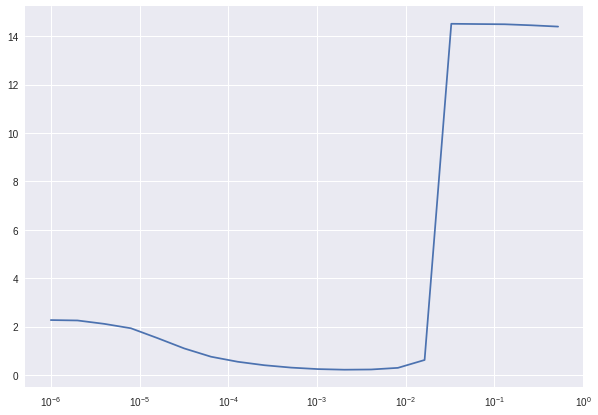

In [32]:
#lrs[0] = init_lr
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(lrs,losses)
ax.set_xscale('log')

In [66]:
i = 1

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 
opt = Adam(lr=init_lr*2**i)

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['acc'])


hist = model.fit(X_train, Y_train, batch_size = 128, epochs=1)

loss = hist.history['loss'][0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 70us/step - loss: 0.4450 - acc: 0.8750 - val_loss: 0.1921 - val_acc: 0.9418
Epoch 2/4
60000/60000 [==============================] - 4s 64us/step - loss: 0.1795 - acc: 0.9481 - val_loss: 0.1301 - val_acc: 0.9610
Epoch 3/4
60000/60000 [==============================] - 4s 66us/step - loss: 0.1293 - acc: 0.9626 - val_loss: 0.0996 - val_acc: 0.9683
Epoch 4/4
60000/60000 [==============================] - 4s 64us/step - loss: 0.0996 - acc: 0.9702 - val_loss: 0.0878 - val_acc: 0.9727


In [69]:
hist.history['loss'][0]

0.4450331950267156